In [1]:
## Cleaning the questions & Exploratory Data Analysis

###Repurposed code from https://github.com/htanjore/covid19_pubmed/blob/master/notebooks/LDA_Topic_model_covid19.ipynb

In [2]:
import pandas as pd
import seaborn as sns

import re

import nltk
from nltk.corpus import stopwords

import gensim
import gensim.corpora as corpora
from gensim.utils import lemmatize
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.models.phrases import Phrases, Phraser

import spacy
from spacy.lemmatizer import Lemmatizer
from spacy.lang.en.stop_words import STOP_WORDS
import en_core_web_lg

import string

import pyLDAvis
import pyLDAvis.gensim

from pprint import pprint
from os import path
#from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer

import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize

%matplotlib inline

/Users/bkozissnik/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
big_stack = pd.read_csv("data/clean_stackoverflow_big.csv")

In [4]:
big_stack.head()

,question,summary,tags,user_id,no_of_votes,no_of_answers,date
0,multiple json objects into a list,"{""Id"": 1,""product"": ""Mobile"",""price"": 32889,""d...","['python', 'json']",diveinsky,0.0,1.0,2019-08-02
1,How to implement like button concept in viewpa...,I have a viewpager which displays images and b...,"['android', 'android-viewpager']",Marat Zangiev,1.0,1.0,2019-08-02
2,Is it a good practice using Observable with as...,I am using angular 2 common http that return a...,"['javascript', 'angular', 'typescript', 'promi...",Ashwin J Chhetri,48.0,2.0,2019-08-02
3,UBSan: Store to misaligned address; what is th...,"I've been running some code under UBSan, and f...",['ubsan'],Flamefire,0.0,1.0,2019-08-02
4,Django-Filter Form Displaying All Filters?,I've just started working with Django Filter. ...,"['django-filter', 'django-filters']",udeep shrestha,0.0,2.0,2019-08-02


In [5]:
big_stack.shape

(16955385, 7)

In [ ]:
%%time

stop_words = stopwords.words('english')
nlp = en_core_web_lg.load(disable=['parser', 'ner'])

# clean the text using below for loop
clean_text = []
for index in range(len(big_stack)):
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', big_stack['question'][index])

    #Convert to lowercase
    text = text.lower()
    
    #remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    #Convert to list of words from text
    text = text.split()
    
    # remove stop words after splitting text and joint the words
    text =[word for word in text if word not in stop_words]
    text = " ".join(text)
    # lemmatize words using spacy
    
    doc = nlp(text)
    text=" ".join([token.lemma_ for token in doc])

   # append to clean_text
    clean_text.append(text)
    
big_stack['clean_text'] = clean_text

In [ ]:
# Exporting the dataframe including the "clean text"

#big_stack.to_csv('clean_text_big_questions.csv', index=False)

In [6]:
big_stack = pd.read_csv('clean_big_questions_052320.csv')

In [7]:
big_stack.head()

,question,summary,tags,user_id,no_of_votes,no_of_answers,date,clean_text
0,multiple json objects into a list,"{""Id"": 1,""product"": ""Mobile"",""price"": 32889,""d...","['python', 'json']",diveinsky,0.0,1.0,2019-08-02,multiple json object list
1,How to implement like button concept in viewpa...,I have a viewpager which displays images and b...,"['android', 'android-viewpager']",Marat Zangiev,1.0,1.0,2019-08-02,implement like button concept viewpager
2,Is it a good practice using Observable with as...,I am using angular 2 common http that return a...,"['javascript', 'angular', 'typescript', 'promi...",Ashwin J Chhetri,48.0,2.0,2019-08-02,good practice use observable async await
3,UBSan: Store to misaligned address; what is th...,"I've been running some code under UBSan, and f...",['ubsan'],Flamefire,0.0,1.0,2019-08-02,ubsan store misalign address problem care
4,Django-Filter Form Displaying All Filters?,I've just started working with Django Filter. ...,"['django-filter', 'django-filters']",udeep shrestha,0.0,2.0,2019-08-02,django filter form display filter


In [ ]:
# Creating a new dataframe only containing question with a Python Tag

#python_stack = big_stack[big_stack['tags'].str.contains(pat = 'python')]
#python_stack.shape

In [ ]:
# Exporting the dataframe for later use

#python_stack.to_csv('clean_python_stack.csv', index=False)

In [ ]:
# Creating a new dataframe only containing question with a SQL Tag

#sql_stack = big_stack[big_stack['tags'].str.contains(pat = 'sql')]
#sql_stack.shape

In [ ]:
#sql_stack.to_csv('clean_sql_stack.csv', index=False)

In [8]:
# Creating a new dataframe only containing question with a R Tag

r_stack = big_stack[big_stack['tags'].str.contains(pat = "(\'r'{1})")]

/Users/bkozissnik/anaconda3/lib/python3.7/site-packages/pandas/core/strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [9]:
r_stack.to_csv('clean_r_stack.csv', index=False)

In [10]:
r_stack.head()

,question,summary,tags,user_id,no_of_votes,no_of_answers,date,clean_text
7,How do I upload a R dataframe as a CSV file on...,I'm trying to convert a dataframe in R to a CS...,"['r', 'azure', 'azure-storage-blobs']",Peter Pan,2.0,1.0,2019-08-02,upload r dataframe csv file azure blob storage
17,Filtering a dataframe with respect to the list...,I am in trouble with making multi filtering in...,"['r', 'tidyverse']",Steve Lee,1.0,1.0,2019-08-02,filtering dataframe respect list datum
37,r data frame check next n number of variables,I have a data frame as follows where x is a bo...,"['r', 'dataframe']",TheN,1.0,2.0,2019-08-02,r data frame check next n number variable
91,Matching based on column vector,I need to create a matrix based on matching t...,"['r', 'matrix', 'pattern-matching', 'match']",JC3019,0.0,0.0,2019-08-02,match base column vector
123,Converting dgCMatrix to logical matrix,Consider this simple sparse matrix\n\n> (X <- ...,"['r', 'matrix', 'sparse-matrix', 'logical-oper...",Roland,3.0,2.0,2019-08-02,convert dgcmatrix logical matrix


In [11]:
r_stack['clean_text'].isna().sum()

6

In [12]:
r_stack = r_stack.dropna(subset=['clean_text'])

In [13]:
r_stack['clean_text'] = r_stack['clean_text'].str.split(' ')

In [14]:
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [15]:
nlp = en_core_web_lg.load(disable=['parser', 'ner'])

In [16]:
%%time
lemmatized_words = lemmatization(r_stack['clean_text'], allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

CPU times: user 15min 7s, sys: 6.93 s, total: 15min 14s
Wall time: 15min 20s


In [17]:
stop_words = stopwords.words('english')

                  Bigram         Freq
0             data frame  2978.735878
1            datum table  1366.920881
2            datum frame  1038.671140
3            column name  1014.910089
4           value column   916.132847
5        multiple column   809.941798
6              shiny app   694.020318
7             new column   646.734332
8             create new   617.774375
9           column value   600.932630
10        apply function   592.517203
11           column data   553.593556
12           column base   503.934700
13      column duplicate   493.347169
14      column dataframe   479.354480
15            row column   476.053244
16              use loop   464.145687
17             use dplyr   452.059183
18             error use   431.926787
19          use function   431.799093
20            data table   407.119659
21         variable name   379.929700
22          column datum   379.756776
23          frame column   376.442066
24           time series   372.996367
25          

[Text(0, 0, 'data frame'),
 Text(0, 0, 'datum table'),
 Text(0, 0, 'datum frame'),
 Text(0, 0, 'column name'),
 Text(0, 0, 'value column'),
 Text(0, 0, 'multiple column'),
 Text(0, 0, 'shiny app'),
 Text(0, 0, 'new column'),
 Text(0, 0, 'create new'),
 Text(0, 0, 'column value'),
 Text(0, 0, 'apply function'),
 Text(0, 0, 'column data'),
 Text(0, 0, 'column base'),
 Text(0, 0, 'column duplicate'),
 Text(0, 0, 'column dataframe'),
 Text(0, 0, 'row column'),
 Text(0, 0, 'use loop'),
 Text(0, 0, 'use dplyr'),
 Text(0, 0, 'error use'),
 Text(0, 0, 'use function'),
 Text(0, 0, 'data table'),
 Text(0, 0, 'variable name'),
 Text(0, 0, 'column datum'),
 Text(0, 0, 'frame column'),
 Text(0, 0, 'time series'),
 Text(0, 0, 'plot use'),
 Text(0, 0, 'datum set'),
 Text(0, 0, 'list list'),
 Text(0, 0, 'element list'),
 Text(0, 0, 'add column'),
 Text(0, 0, 'use package'),
 Text(0, 0, 'base column'),
 Text(0, 0, 'bar chart'),
 Text(0, 0, 'column use'),
 Text(0, 0, 'bar plot'),
 Text(0, 0, 'row datum'

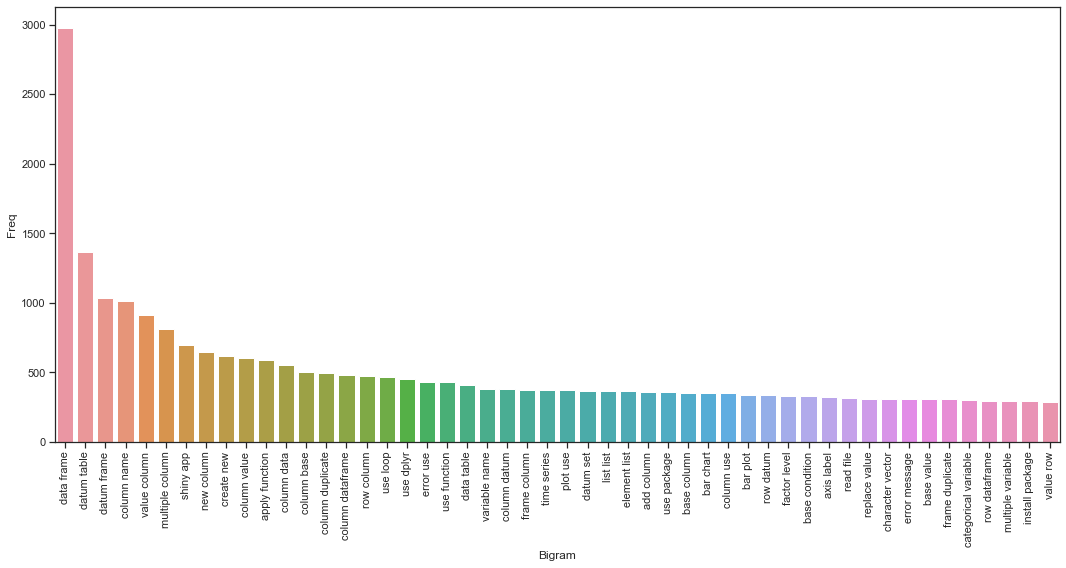

In [18]:
%%time

def top_bi_grams(clean_text, n=None):
    clean_text = [" ".join(x) for x in lemmatized_words]
    vectorizer = TfidfVectorizer(ngram_range = (2,2), min_df = 2,stop_words=stop_words).fit(clean_text)
    bows = vectorizer.transform(clean_text)
    sumwords = bows.sum(axis=0) 
    words_freq = [(word, sumwords[0, idx]) for word, idx in     
                  vectorizer.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

top_bigrams = top_bi_grams(r_stack['clean_text'], n=50)
top_bigrams_df = pd.DataFrame(top_bigrams)
top_bigrams_df.columns=["Bigram", "Freq"]
print(top_bigrams_df)

#top_bigrams_df.to_csv('r_bigrams.csv')

#Barplot of most freq Bi-grams
sns.set(rc={'figure.figsize':(18,8)}, style ='white' )
sns.set_style("ticks")

h=sns.barplot(x="Bigram", y="Freq", data=top_bigrams_df)
h.set_xticklabels(h.get_xticklabels(), rotation=90);

                  Trigram        Freq
0       column data frame  581.579535
1       create new column  318.883665
2        value data frame  270.364026
3         list data frame  259.490385
4         use datum table  235.474748
5    data frame duplicate  226.180784
6      column datum table  221.825164
7     could find function  214.339789
8     create new variable  205.454478
9       data frame column  197.517315
10         row data frame  196.340057
11         data frame use  182.509326
12        row datum frame  166.985835
13        data frame base  165.948570
14   user define function  157.962249
15      subset data frame  154.852137
16         add new column  146.578221
17      create data frame  141.828093
18        data frame list  138.515305
19    variable data frame  130.510448
20        name data frame  121.640663
21        new column base  119.787445
22      base value column  117.993627
23        row datum table  114.009690
24   multiple datum frame  105.470781
25      merg

[Text(0, 0, 'column data frame'),
 Text(0, 0, 'create new column'),
 Text(0, 0, 'value data frame'),
 Text(0, 0, 'list data frame'),
 Text(0, 0, 'use datum table'),
 Text(0, 0, 'data frame duplicate'),
 Text(0, 0, 'column datum table'),
 Text(0, 0, 'could find function'),
 Text(0, 0, 'create new variable'),
 Text(0, 0, 'data frame column'),
 Text(0, 0, 'row data frame'),
 Text(0, 0, 'data frame use'),
 Text(0, 0, 'row datum frame'),
 Text(0, 0, 'data frame base'),
 Text(0, 0, 'user define function'),
 Text(0, 0, 'subset data frame'),
 Text(0, 0, 'add new column'),
 Text(0, 0, 'create data frame'),
 Text(0, 0, 'data frame list'),
 Text(0, 0, 'variable data frame'),
 Text(0, 0, 'name data frame'),
 Text(0, 0, 'new column base'),
 Text(0, 0, 'base value column'),
 Text(0, 0, 'row datum table'),
 Text(0, 0, 'multiple datum frame'),
 Text(0, 0, 'merge datum frame'),
 Text(0, 0, 'error object find'),
 Text(0, 0, 'data frame row'),
 Text(0, 0, 'value true false'),
 Text(0, 0, 'datum table dup

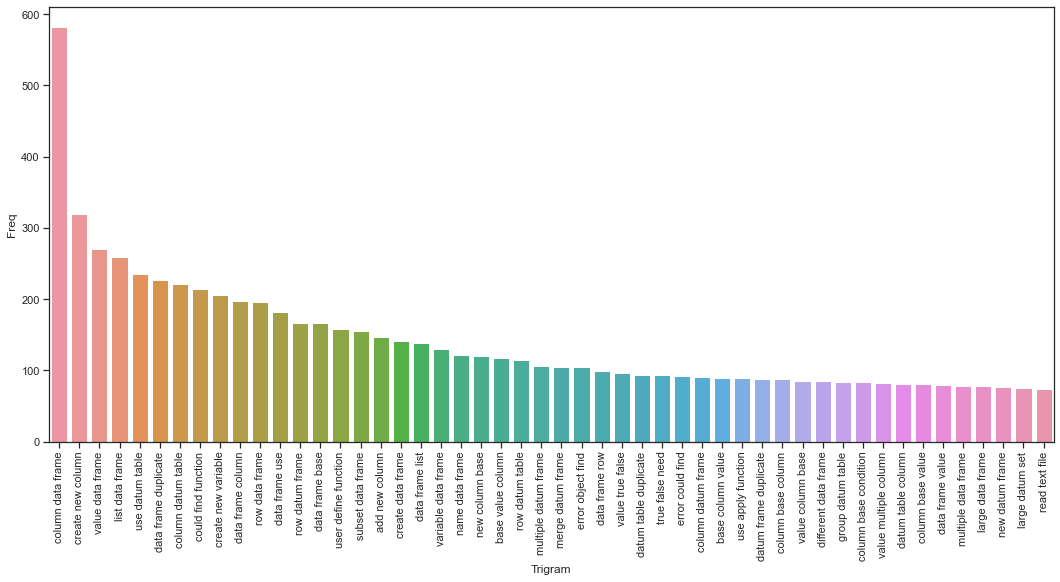

In [19]:
%%time

def top_tri_grams(clean_text, n=None):
    clean_text = [" ".join(x) for x in lemmatized_words]
    vectorizer = TfidfVectorizer(ngram_range = (3,3), min_df = 2,stop_words=stop_words).fit(clean_text)
    bows = vectorizer.transform(clean_text)
    sumwords = bows.sum(axis=0) 
    words_freq = [(word, sumwords[0, idx]) for word, idx in     
                  vectorizer.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

top_trigrams = top_tri_grams(r_stack['clean_text'], n=50)
top_trigrams_df = pd.DataFrame(top_trigrams)
top_trigrams_df.columns=["Trigram", "Freq"]
print(top_trigrams_df)

#top_trigrams_df.to_csv('r_trigrams.csv')


#Barplot of most freq Tri-grams
sns.set(rc={'figure.figsize':(18,8)}, style ='white' )
sns.set_style("ticks")

j=sns.barplot(x="Trigram", y="Freq", data=top_trigrams_df)
j.set_xticklabels(j.get_xticklabels(), rotation=90);

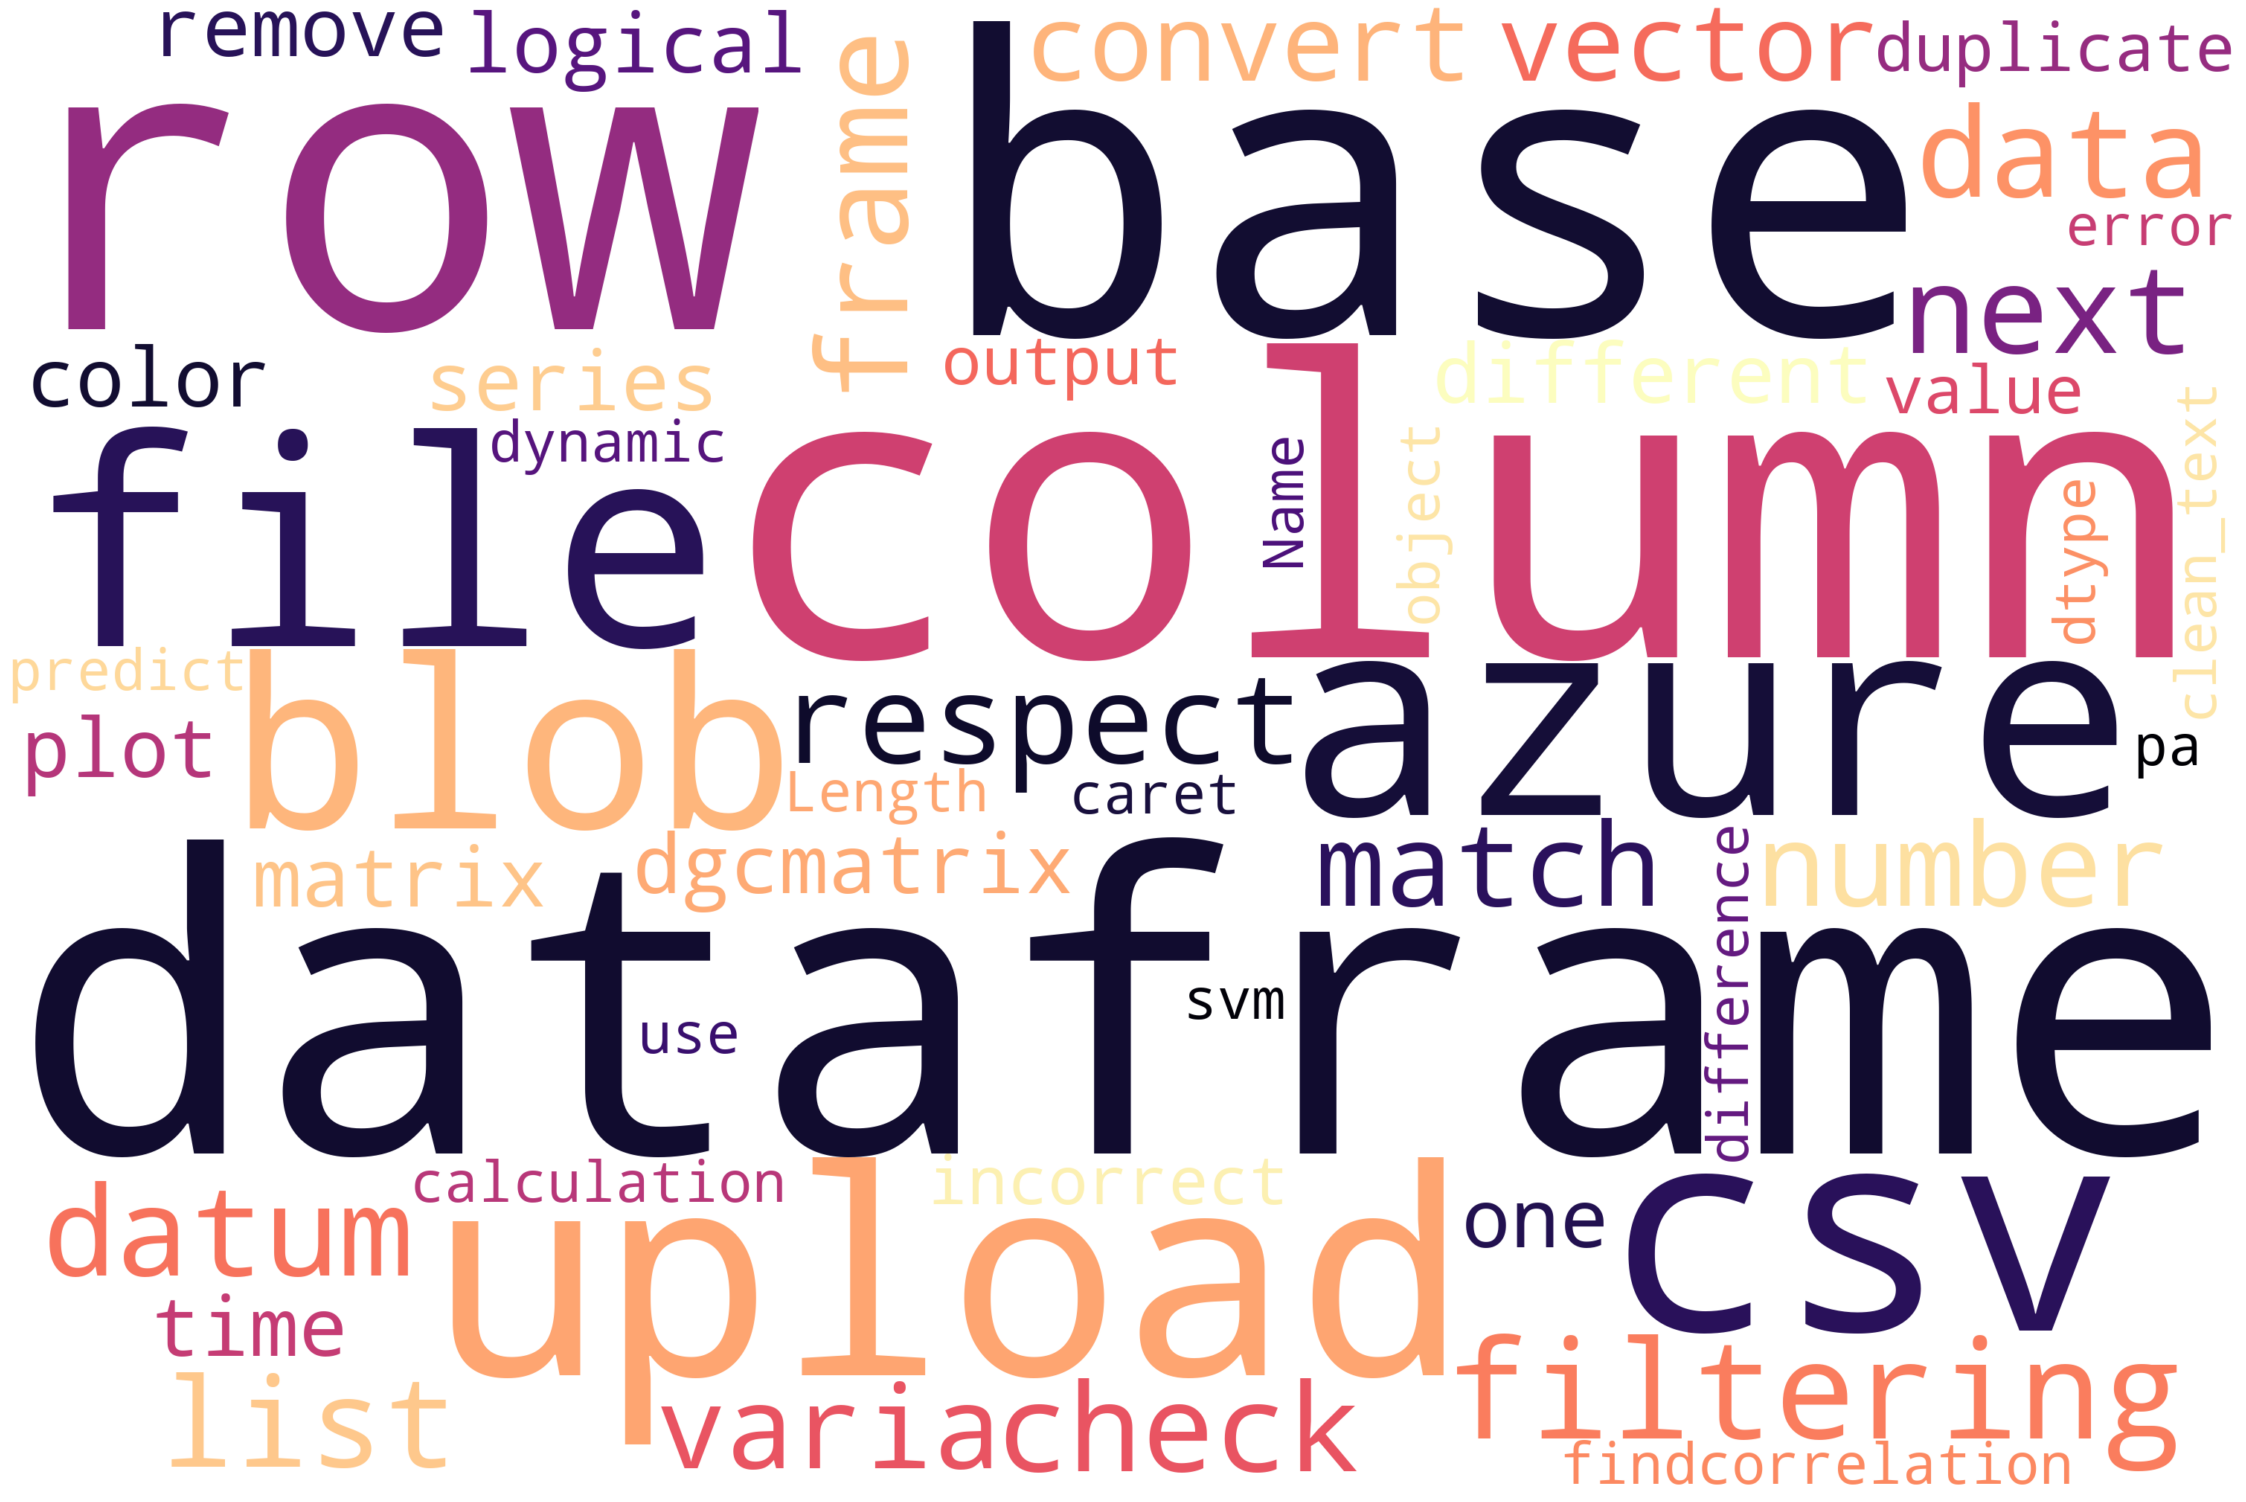

In [20]:
clean_text = r_stack['clean_text']

#Word cloud of 100 words in the entire clean text
wordcloud = WordCloud(width = 3000,
    height = 2000,background_color='white',colormap=plt.cm.magma,
                          stopwords=stop_words,
                          max_words=100,
                           
                          random_state=42,collocations=False
                         ).generate(str(clean_text))

#print(wordcloud)
plt.figure(figsize = (40, 30), edgecolor = 'k')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig("data/wordcloud_questions_r.png")
plt.show()